# EDA on TITANIC Dataset

Below are the details of the column/feature names and their description I have gathered from the web:

| **Column Name** | **Meaning**                                                               |
| --------------- | ------------------------------------------------------------------------- |
| `survived`      | Survival status (0 = No, 1 = Yes)                                         |
| `pclass`        | Passenger class (1 = First, 2 = Second, 3 = Third)                        |
| `sex`           | Gender of the passenger (male/female)                                     |
| `age`           | Age of the passenger in years                                             |
| `sibsp`         | Number of siblings or spouses aboard the Titanic                          |
| `parch`         | Number of parents or children aboard the Titanic                          |
| `fare`          | Ticket fare paid by the passenger                                         |
| `embarked`      | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)      |
| `class`         | Passenger class (duplicate of `pclass`, but as a category)                |
| `who`           | Passenger type (man, woman, child — based on age and gender)              |
| `adult_male`    | Whether the passenger is an adult male (True/False)                       |
| `deck`          | The deck where the passenger's cabin was located (A–G, some missing)      |
| `embark_town`   | Name of the town where the passenger boarded the ship                     |
| `alive`         | Survival status (duplicate of `survived`, but as 'yes'/'no')              |
| `alone`         | Whether the passenger was alone (True/False based on `sibsp` and `parch`) |



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Display the datset structure
df.info()

# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I started by examining the dataset structure using df.info(). I noticed there are 891 rows and 15 columns. Most fields are complete, but age has 714 non-null entries, and deck is highly incomplete with only 203 non-null values. The dataset includes numerical, categorical, and boolean types.

Then, I used df.describe() to explore the statistics of numerical features like age, fare, sibsp, and parch. The average age of passengers is around 29.7 years, and the oldest person was 80. The average fare is around $32.20, with some passengers paying over $500, indicating a wide income range or potential outlier. Most passengers had no siblings/spouse or parents/children aboard (as shown by medians of 0 for sibsp and parch), suggesting many traveled alone.

The survived column shows an average of 0.38, meaning about 38% of passengers survived.

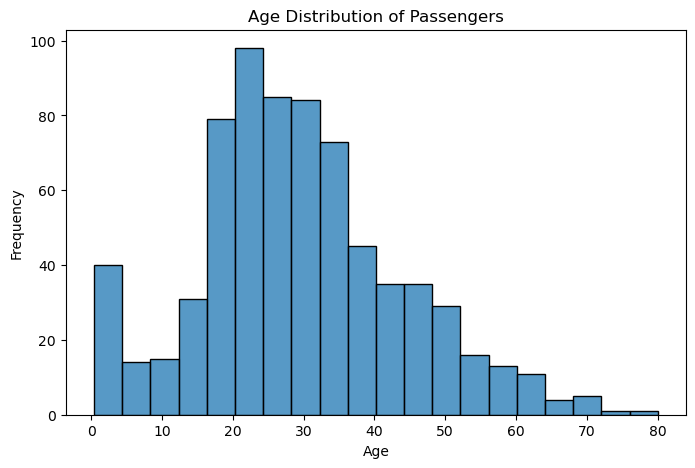

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'])
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Most passengers were between 20–40 years old. There are fewer children and elderly passengers

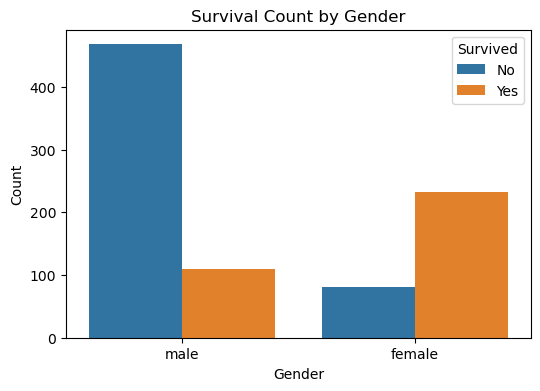

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


This barplot made it very clear that a much higher proportion of women survived compared to men. While most men did not survive, the majority of women did. This suggests women were given first priority.

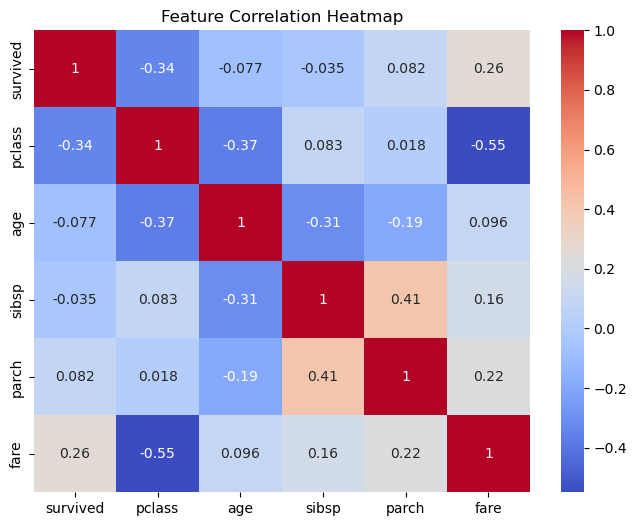

In [36]:
corr = df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
